In [38]:
import dlib #http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
import cv2
import matplotlib.pyplot as plt

In [39]:
# helper function 
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [43]:
class LandmarkExtractor():
    def __init__(self, predictor_path):
        self.predictor = dlib.shape_predictor(predictor_path)
        self.detector = dlib.get_frontal_face_detector()
        self.landmark_tuple = []

    def get_landmarks(self, image, image2=None, show=False, num_points=68):
        # detect faces in the grayscale image
        faces = [self.detector(image, 1)]
        if image2 is not None:
            faces.append(self.detector(image2, 1))
        # loop over the face detections
        for (idx, face) in enumerate(faces):
            for (i, rect) in enumerate(face):
                # determine the facial landmarks for the face region, then
                # convert the facial landmark (x, y)-coordinates to a NumPy array
                if idx == 0:
                    landmarks = self.predictor(image, rect)
                else:
                    landmarks = self.predictor(image2, rect)
                img_landmark_tuple = []
                for n in range(0, num_points):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    img_landmark_tuple.append([x, y])
                self.landmark_tuple.append(img_landmark_tuple)
               
        if show:
            self.show_landmarks(image, image2)

        return self.landmark_tuple
    
    def show_landmarks(self, image, image2=None):
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for landmark in self.landmark_tuple:
            if (image2 is not None):
                for (x, y) in landmark:
                    cv2.circle(image2, (x, y), 1, (255, 255, 0), 10)
            for (x, y) in landmark:
                cv2.circle(image, (x, y), 1, (255, 255, 0), 10)
        # show the output image with the face detections + facial landmarks
        plt_imshow("Landmarks", image)
        if image2 is not None:
            plt_imshow("Landmarks", image2)
    

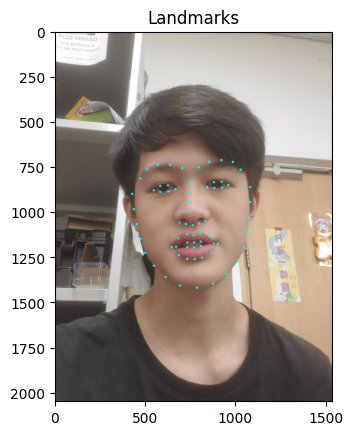

In [44]:
# extracter = LandmarkExtractor("shape_predictor_68_face_landmarks.dat")
# image = cv2.imread("img/me_without_mask4.jpg")
# landmarks = extracter.get_landmarks(image, show=True)


In [45]:
# face_detector = dlib.get_frontal_face_detector()
# landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# img = dlib.load_rgb_image("img/me_without_mask4.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# faces = face_detector(img, 1)

# landmark_tuple = []
# for k, d in enumerate(faces):
#    landmarks = landmark_detector(img, d)
#    for n in range(0, 68):
#       x = landmarks.part(n).x
#       y = landmarks.part(n).y
#       landmark_tuple.append((x, y))
#       cv2.circle(img, (x, y), 2, (255, 255, 0), 3)
      
# plt_imshow("Facial Landmark", img)